In [1]:
USERS = 40
ROUNDS = 500

In [2]:
import json
def get_acc_list(file_path: str) -> list:
    acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    acc_lines = lines[-USERS:]

    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            acc_list.append(acc_data['Results_raw']['test_acc'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    acc_list = [round(float(acc), 4) for acc in acc_list]
    return acc_list

In [3]:
def get_avg_acc_list(file_path: str) -> float:
    avg_acc_list = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
    acc_lines = lines[:ROUNDS]
    for line in acc_lines:
        line = line.replace('\'', '"')  # 替换单引号为双引号以确保 JSON 格式正确
        # 使用 json.loads() 解析每一行
        try:
            acc_data = json.loads(line.strip())
            avg_acc_list.append(acc_data['Results_weighted_avg']['test_acc'])
        except json.JSONDecodeError:
            print(f"Error decoding JSON from line: {line.strip()}")
    avg_acc_list = [round(float(acc), 4) for acc in avg_acc_list]
    return avg_acc_list


In [ ]:
exp_paths = {
    "ditto": "exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812114851", 
    "fedavg": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812114852",
    "fedprox": "exp/fedprox_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812114852",
    "fedbn": "exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812114854",
    "local": "exp/local_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812020910",
    "mix": "exp/mix_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812014526",
    "pfedme": "exp/PFedMe_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812013600"
}

In [5]:
exp_acc_for_users = {}
exp_acc_for_rounds = {}
for exp_name, exp_path in exp_paths.items():
    print(f"Processing experiment: {exp_name} at {exp_path}")
    acc_list = get_acc_list(f"{exp_path}/eval_results.log")
    avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log")
    exp_acc_for_users[exp_name] = acc_list
    exp_acc_for_rounds[exp_name] = avg_acc_list

Processing experiment: ditto at exp/ditto_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250811231057
Processing experiment: fedavg at exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250811231056
Processing experiment: fedprox at exp/fedprox_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250811231057
Processing experiment: fedbn at exp/fedavg_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250811231057
Processing experiment: local at exp/local_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812020910
Processing experiment: mix at exp/mix_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812014526
Processing experiment: pfedme at exp/PFedMe_pacs_resnet10_on_pacs_lr0.01_lstep1/sub_exp_20250812013600


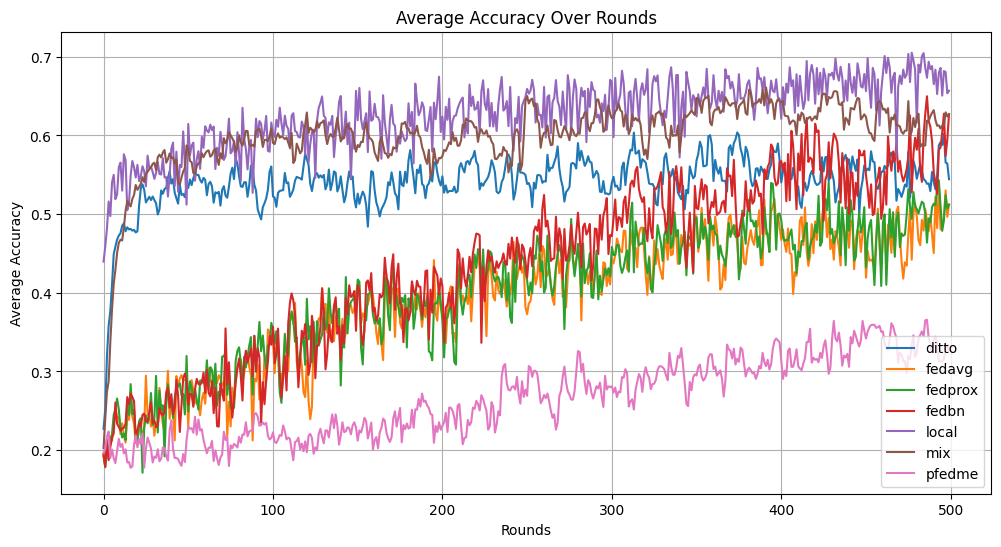

In [6]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每轮平均准确率，帮我在一张图上使用matplotlib绘制每个实验的平均准确率曲线
import matplotlib.pyplot as plt
def plot_avg_accuracy(exp_datas: dict):
    plt.figure(figsize=(12, 6))

    for exp_name, acc_list in exp_datas.items():
        plt.plot(acc_list, label=exp_name)

    plt.title('Average Accuracy Over Rounds')
    plt.xlabel('Rounds')
    plt.ylabel('Average Accuracy')
    plt.legend()
    plt.grid()
    plt.show()
plot_avg_accuracy(exp_acc_for_rounds)

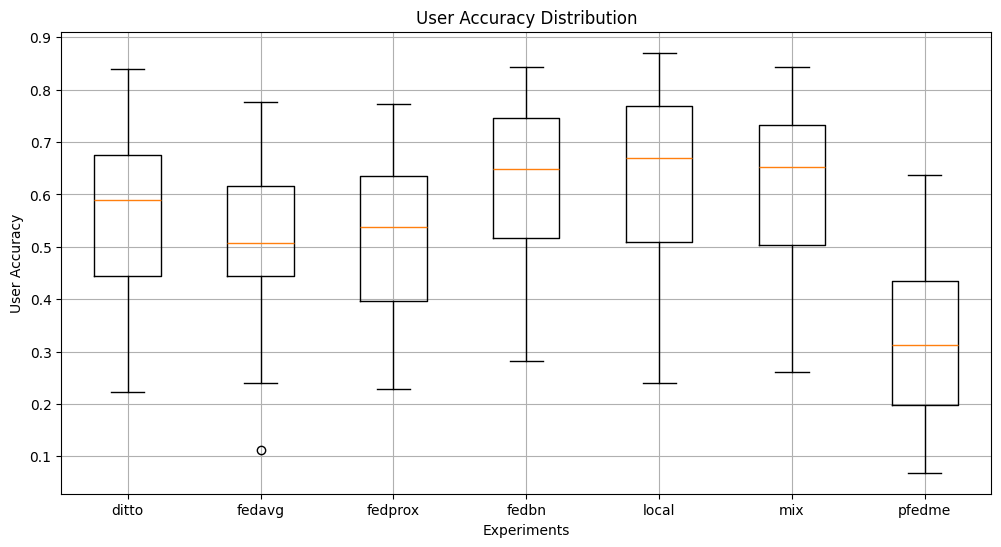

In [7]:
# 实现一个函数，输入为字典，其中键为实验名称，值为对应的每个用户的准确率，帮我在一张图上使用matplotlib绘制每个实验的用户准确率分布的箱线图
def plot_user_accuracy(exp_datas: dict):
    plt.figure(figsize=(12, 6))

    # 准备数据
    data = [exp_datas[exp_name] for exp_name in exp_datas.keys()]
    labels = list(exp_datas.keys())

    # 绘制箱线图
    plt.boxplot(data, labels=labels)

    plt.title('User Accuracy Distribution')
    plt.xlabel('Experiments')
    plt.ylabel('User Accuracy')
    plt.grid()
    plt.show()
plot_user_accuracy(exp_acc_for_users)

In [8]:
# USERS = 20
# ROUNDS = 200
# exp_paths = {
#     # "ditto": "exp/ditto_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811231111", 
#     "fedavg": "exp/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811231111",
#     "fedprox": "exp/fedprox_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811231112",
#     "local": "exp/local_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811231110",
#     "mix": "exp/mix_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811233410",
#     "pfedme": "exp/PFedMe_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811233537"
# }
# exp_acc_for_users = {}
# exp_acc_for_rounds = {}
# for exp_name, exp_path in exp_paths.items():
#     print(f"Processing experiment: {exp_name} at {exp_path}")
#     acc_list = get_acc_list(f"{exp_path}/eval_results.log")
#     avg_acc_list = get_avg_acc_list(f"{exp_path}/eval_results.log")
#     exp_acc_for_users[exp_name] = acc_list
#     exp_acc_for_rounds[exp_name] = avg_acc_list
# plot_avg_accuracy(exp_acc_for_rounds)
# plot_user_accuracy(exp_acc_for_users)

Processing experiment: fedavg at exp/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811231111


FileNotFoundError: [Errno 2] No such file or directory: 'exp/fedavg_office_caltech_alexnet_on_office_caltech_lr0.01_lstep1/sub_exp_20250811231111/eval_results.log'